In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [2]:
## random values for reproducibility
np.random.seed(0)

In [3]:
##Dogs data
dog_whisker_length= np.random.normal(loc=5, scale=1, size=10)
dog_ear_flappiness= np.random.normal(loc=8, scale=1, size=10)

In [4]:
##Cats data
cat_whisker_length= np.random.normal(loc=8, scale=1, size=10)
cat_ear_flappiness= np.random.normal(loc=5, scale=1, size=10)

In [5]:
# Combine data
data_dogs= np.vstack((dog_whisker_length, dog_ear_flappiness)).T
data_cats= np.vstack((cat_whisker_length, cat_ear_flappiness)).T
data=np.vstack((data_dogs, data_cats)).T
labels=np.hstack((np.zeros(len(data_dogs)), np.ones(len(data_cats)))) # 0 for dogs, 1 for cats

In [6]:
data

array([[ 6.76405235,  5.40015721,  5.97873798,  7.2408932 ,  6.86755799,
         4.02272212,  5.95008842,  4.84864279,  4.89678115,  5.4105985 ,
         5.44701018,  8.6536186 ,  8.8644362 ,  7.25783498, 10.26975462,
         6.54563433,  8.04575852,  7.81281615,  9.53277921,  9.46935877],
       [ 8.14404357,  9.45427351,  8.76103773,  8.12167502,  8.44386323,
         8.33367433,  9.49407907,  7.79484174,  8.3130677 ,  7.14590426,
         5.15494743,  5.37816252,  4.11221425,  3.01920353,  4.65208785,
         5.15634897,  6.23029068,  6.20237985,  4.61267318,  4.69769725]])

In [7]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.T, labels, test_size=0.2, random_state=42) 


In [9]:
X_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

In [10]:
X_test

array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

In [11]:
y_train

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.])

In [12]:
y_test

array([0., 1., 1., 0.])

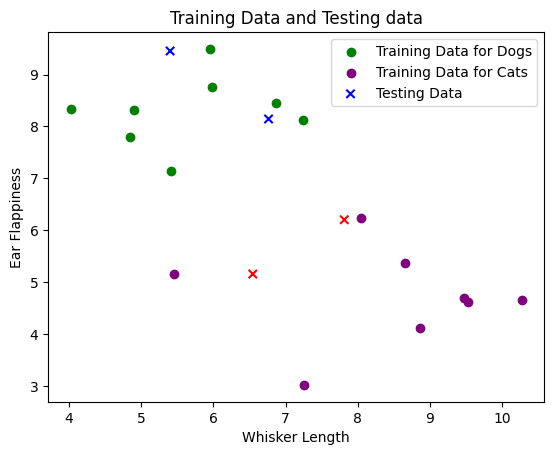

In [13]:
##Plot training and testing data
plt.scatter(X_train[y_train==0][:,0] , X_train[y_train==0][:,1], label='Training Data for Dogs', color='green')
plt.scatter(X_train[y_train==1][:,0] , X_train[y_train==1][:,1], label='Training Data for Cats', color='purple')
plt.scatter(X_test[:,0] , X_test[:,1], c=y_test, cmap='bwr', label='Testing Data',marker='x')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness')
plt.title('Training Data and Testing data')
plt.legend()
plt.show()

In [14]:
##Implementing Random linear classifier algorithm
def random_linear_classifier(data_dogs, data_cats ,k, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0, best_error

def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error

In [15]:
##Run the random linear classifier algorithm
k = 100 #number of iterations
d = 2 #number of features
best_theta_train, best_theta0_train, train_error = random_linear_classifier(X_train[y_train==0], X_train[y_train==1], k, d)

In [16]:
## Plot desicion boundary for training data
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1]) * x_vals_train - (best_theta0_train / best_theta_train[1])

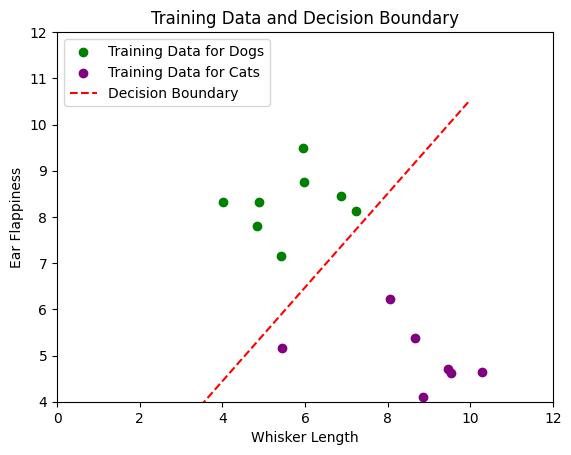

In [17]:
plt.scatter(X_train[y_train==0][:,0] , X_train[y_train==0][:,1], label='Training Data for Dogs', color='green')
plt.scatter(X_train[y_train==1][:,0] , X_train[y_train==1][:,1], label='Training Data for Cats', color='purple')
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='Decision Boundary')
#Set same limits for both axes
plt.xlim([0, 12])
plt.ylim([4, 12])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness')
plt.title('Training Data and Decision Boundary')
plt.legend()
plt.show()
# Ensure the decision boundary is within the plot limits
 


In [18]:
train_error

0

In [19]:
test_error=compute_error(X_test[y_test==0], X_test[y_test==1], best_theta_train, best_theta0_train)
print("Test Error: ", test_error)

Test Error:  0


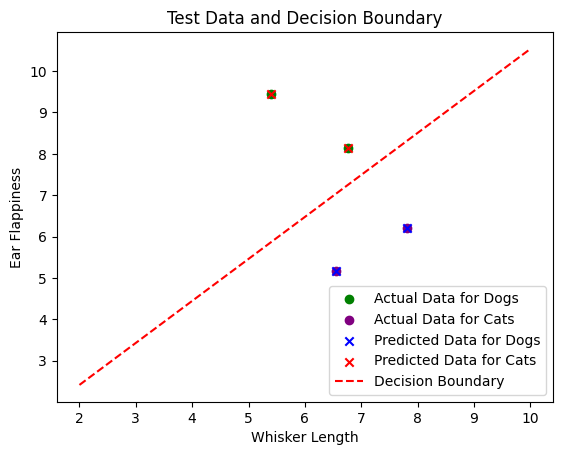

In [20]:
## Plot actual test data and predicted test data
plt.scatter(X_test[y_test==0][:,0] , X_test[y_test==0][:,1], label='Actual Data for Dogs', color='green')
plt.scatter(X_test[y_test==1][:,0] , X_test[y_test==1][:,1], label='Actual Data for Cats', color='purple')

#Predicted test data
predicted_labels = np.zeros_like(y_test)
for i, x_test in enumerate (X_test):
    if np.dot(best_theta_train, x_test) + best_theta0_train > 0:
        predicted_labels[i] = 1 # Cat

#Plot predicted test data points
plt.scatter(X_test[predicted_labels==0][:,0] , X_test[predicted_labels==0][:,1], label='Predicted Data for Dogs', color='blue', marker='x')
plt.scatter(X_test[predicted_labels==1][:,0] , X_test[predicted_labels==1][:,1], label='Predicted Data for Cats', color='red', marker='x')

#plot decision boundary
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness')
plt.title('Test Data and Decision Boundary')
plt.legend()
plt.show()
    